# Parameterization of the mean flux

The mean transmitted flux fraction, or mean flux, is one of the main nuisances in Lyman alpha analyses. 

In this notebook we discuss possible parameterizations of the mean flux, and choose priors for the parameters.

There are several parameterizations possible:
 - On one extreme, we could decide to have a free parameter $\bar{F}_i$ for each redshift bin, for a total of 10-12 parameters.
 - On the other extreme, we could describe it as a power law in effective optical depth, $\tau_{\rm eff} = \log \bar{F}$, i.e., $\ln \tau_{\rm eff}(z) = \ln \tau_\star + n_\tau \ln \left( \frac{1+z}{1+z_\star} \right) $.
 - We will probably end up using something in between, like a low-order polynomial in log optical depth. 
 
For this notebook, we will use three parameters to describe the mean flux:
$$ \ln \tau_{\rm eff}(z) = \ln \tau_\star + n_\tau \ln \left( \frac{1+z}{1+z_\star} \right) + \alpha_\tau \ln^2 \left( \frac{1+z}{1+z_\star} \right) $$

The nuisance parameters, therefore, will be 
$$ \phi = \{ \tau_\star , n_\tau , \alpha_\tau \} $$

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
## Set default plot size, as normally its a bit too small
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 120
mpl.rcParams['figure.dpi'] = 120
import mean_flux_model

In [2]:
# construct two models for the mean flux, with different number of parameters
mf_model=mean_flux_model.MeanFluxModel(z_tau=2.25,ln_tau_coeff=[0.4,3.2,-1.5])
mf_model_fid=mean_flux_model.MeanFluxModel()

Text(0.5, 1.0, 'Effective optical depth')

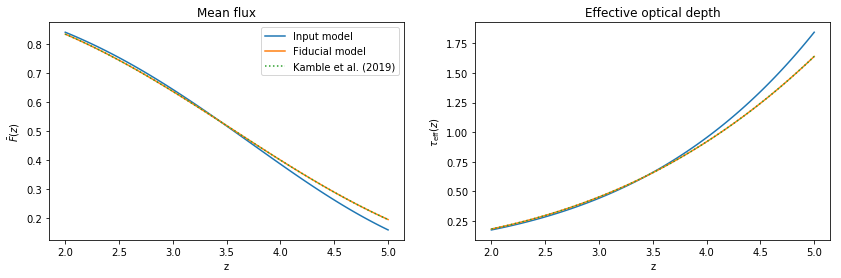

In [3]:
# plot mean flux and effective optical depth in both models, vs literature
z=np.linspace(2.0,5.0,100)
mf_Kamble2019=mean_flux_model.mean_flux_Kamble2019(z)
mf=mf_model.get_mean_flux(z)
mf_fid=mf_model_fid.get_mean_flux(z)

plt.figure(figsize=[14,4])
# start with mean flux
plt.subplot(1, 2, 1)
plt.plot(z,mf,label='Input model')
plt.plot(z,mf_fid,label='Fiducial model')
plt.plot(z,mf_Kamble2019,ls=':',label='Kamble et al. (2019)')
plt.xlabel('z')
plt.ylabel(r'$\bar{F}(z)$')
plt.title('Mean flux')
plt.legend()
# now effective optical depth
plt.subplot(1, 2, 2)
plt.plot(z,-np.log(mf),label='Input model')
plt.plot(z,-np.log(mf_fid),label='Fiducial model')
plt.plot(z,-np.log(mf_Kamble2019),ls=':',label='Kamble et al. (2019)')
plt.xlabel('z')
plt.ylabel(r'$\tau_{\rm eff}(z)$')
plt.title('Effective optical depth')
#plt.legend()

### Fit (by eye) mean flux in Planck simulation

In [4]:
mf_sim=[0.21446721,0.25916818,0.31204234,0.37327991,0.4410642,0.51245193,
        0.58332525,0.64994668,0.70942981,0.75873169,0.80263779,0.84035661,0.87284151]
z_sim=np.linspace(5.0,2.0,13)

In [7]:
# model to fit simulation
mf_model=mean_flux_model.MeanFluxModel(z_tau=2.25,ln_tau_coeff=[3.2,-1.7])
#mf_model=mean_flux_model.MeanFluxModel(z_tau=2.25,ln_tau_coeff=[0.5,3.2,-1.7])

Text(0.5, 1.0, 'Effective optical depth')

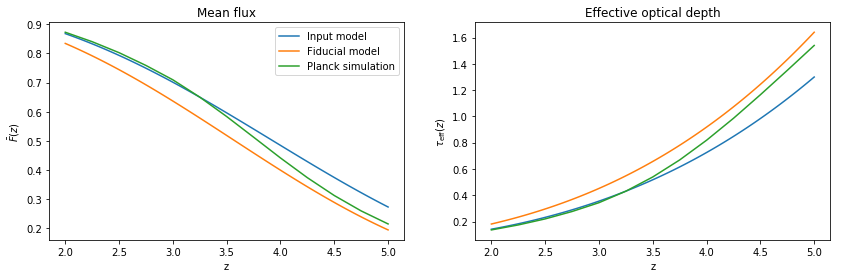

In [8]:
# plot mean flux and effective optical depth in both models, vs literature
z=np.linspace(2.0,5.0,100)
mf_Kamble2019=mean_flux_model.mean_flux_Kamble2019(z)
mf=mf_model.get_mean_flux(z)
mf_fid=mf_model_fid.get_mean_flux(z)

plt.figure(figsize=[14,4])
# start with mean flux
plt.subplot(1, 2, 1)
plt.plot(z,mf,label='Input model')
plt.plot(z,mf_fid,label='Fiducial model')
plt.plot(z_sim,mf_sim,label='Planck simulation')
plt.xlabel('z')
plt.ylabel(r'$\bar{F}(z)$')
plt.title('Mean flux')
plt.legend()
# now effective optical depth
plt.subplot(1, 2, 2)
plt.plot(z,-np.log(mf),label='Input model')
plt.plot(z,-np.log(mf_fid),label='Fiducial model')
plt.plot(z_sim,-np.log(mf_sim),label='Planck simulation')
plt.xlabel('z')
plt.ylabel(r'$\tau_{\rm eff}(z)$')
plt.title('Effective optical depth')
#plt.legend()